In [11]:
%matplotlib inline
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Read img & convert it to gray & save it

True

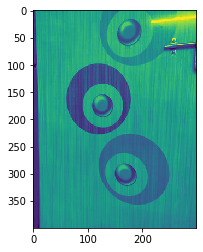

In [12]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('/home/atharva/opencvf/results/test1gray.png',img)

# Capture video & save it into grayscale

In [13]:
cap = cv2.VideoCapture(0)   
  
# Define the codec and create VideoWriter object 
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('/home/atharva/opencvf/results/output.avi', fourcc, 20.0, (int(cap.get(3)),int(cap.get(4)))) 
  
# loop runs if capturing has been initialized.  
while(True): 
    # reads frames from a camera  
    # ret checks return at each frame 
    ret, frame = cap.read()  
  
    # Converts to grayscale space, OCV reads colors as BGR 
    # frame is converted to gray 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
      
    # output the frame 
    out.write(gray)  
      
    # The original input frame is shown in the window  
    cv2.imshow('Original', frame) 
  
    # The window showing the operated video stream  
    cv2.imshow('frame', gray) 
  
      
    # Wait for 'a' key to stop the program  
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break
  
# Close the window / Release webcam 
cap.release() 
  
# After we release our webcam, we also release the out-out.release()  
out.release()  
# De-allocate any associated memory usage  
cv2.destroyAllWindows()

# Draw on image

True

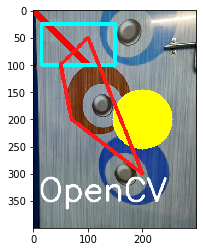

In [14]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
plt.imshow(img)
cv2.line(img, (0,0), (100,100), (255,0,0), 10)
cv2.rectangle(img, (15,25), (150,100), (0,255,255),5)
cv2.circle(img,(200,200), 55, (255,255,0), -1)
pts = np.array([[100,50],[200,300],[70,200],[50,100]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(255,25,25),5)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,350), font, 2,(255,255,255),3,cv2.LINE_AA)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('/home/atharva/opencvf/results/test1draw.png',img)

In [15]:
pts.reshape?

# Trackbars

In [17]:
def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

# Accessing pixel values and image properties

In [18]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
px = img[100,100]
print (px)
blue = img[100,100,0]
print (blue)
print(img.shape)
print(img.size)
print(img.dtype)

[148 148 154]
148
(400, 300, 3)
360000
uint8


# Image ROI and Image channel

True

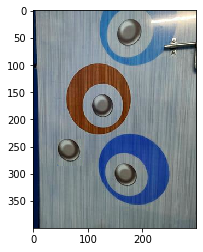

In [19]:
ball = img[282:331, 147:197]
img[237:286, 43:93] = ball
plt.imshow(img)
cv2.imwrite('/home/atharva/opencvf/results/test1ROI.png',img)

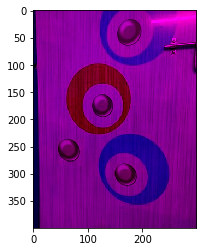

In [20]:
#b,g,r = cv2.split(img)
#img = cv2.merge((b,g,r))
test = img
test[:,:,1] = 0
plt.imshow(test)

# Borders

True

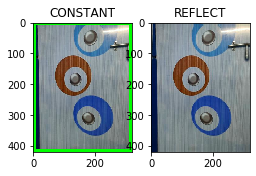

In [22]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
GREEN = [0,255,0]
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=GREEN)
plt.subplot(131),plt.imshow(constant),plt.title('CONSTANT')
plt.subplot(132),plt.imshow(reflect),plt.title('REFLECT')
cv2.imwrite('/home/atharva/opencvf/results/test1consborder.png',constant)
cv2.imwrite('/home/atharva/opencvf/results/test1reflborder.png',reflect)

# Arithematic operation

In [24]:
x = np.uint8([250])
y = np.uint8([10])

print (cv2.add(x,y)) 
print (x+y)

[[255]]
[4]


## Weighted addition, for watermarks

True

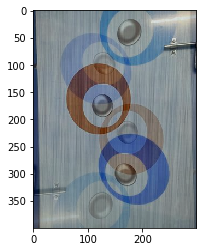

In [25]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
img1 = cv2.imread('/home/atharva/opencvf/test2.jpg')
imp = cv2.addWeighted(img,0.7,img1,0.3,0)
#imp = cv2.add(img,img1)
plt.imshow(imp)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('/home/atharva/opencvf/results/test1add.png',imp)

## Logo on image

True

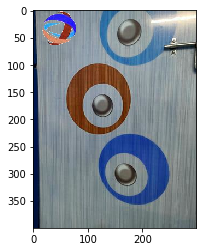

In [27]:
# Load two images
img1 = cv2.imread('/home/atharva/opencvf/test1.jpg')
img2 = cv2.imread('/home/atharva/opencvf/logom.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY)# arg:src,val above which conv to new val,new val
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('/home/atharva/opencvf/results/test1logo.png',img1)